### Import dependencies

In [1]:
%load_ext autotime

import os
import cv2
from IPython.display import display_html, display
from PIL import Image as PILImage
from utils import display_borderless_tables

from img2table.document import Image
from img2table.ocr import TesseractOCR, PaddleOCR

time: 797 ms (started: 2024-07-29 19:04:11 +02:00)


### Borderless table extraction

An algorithm for identification and extraction of borderless tables (i.e not fully bordered). However, the detection might not be as reliable as the one for bordered tables, especially for tables with multi-line cells.

#### Image used
<img src="data/borderless.jpg" width="425" height="550">

In [2]:
img = Image("data/borderless.jpg")
tesseract = TesseractOCR()

# Extract tables with Tesseract and PaddleOCR
tables = img.extract_tables(ocr=tesseract, borderless_tables=True)

tables[0].df

,0,1,2,3
0,Organization Profile,102-1,Name of the organization,Cognizant
1,None,102-2,"Activities, brands, products, and\nservices",2020 10-K
2,None,102-3,Location of headquarters,"Teaneck, New Jersey (U.S)"
3,None,102-4,Location of operations,2020 Annual Report
4,None,102-5,Ownership and legal form,Cognizant Technology Solutions Corp is listed ...
5,None,102-6,Markets served,2020 10-K
6,None,102-7,Scale of the organization,2020 10-K
7,None,102-8,Information on employees and\nother workers,2020 ESG Report: Our global business (p.7)
8,None,102-9,Supply chain,2020 Annual Report\n2020 ESG Report: Supply ch...
9,None,102-10,Significant changes to the\norganization and i...,2020 Annual Report\n2020 ESG Report: Supply ch...


time: 8.28 s (started: 2024-07-29 19:04:11 +02:00)


### Examples

Below are several examples of borderless table extraction.<br>
As for bordered tables, the extraction of merged cells or multi-level headers is also supported.

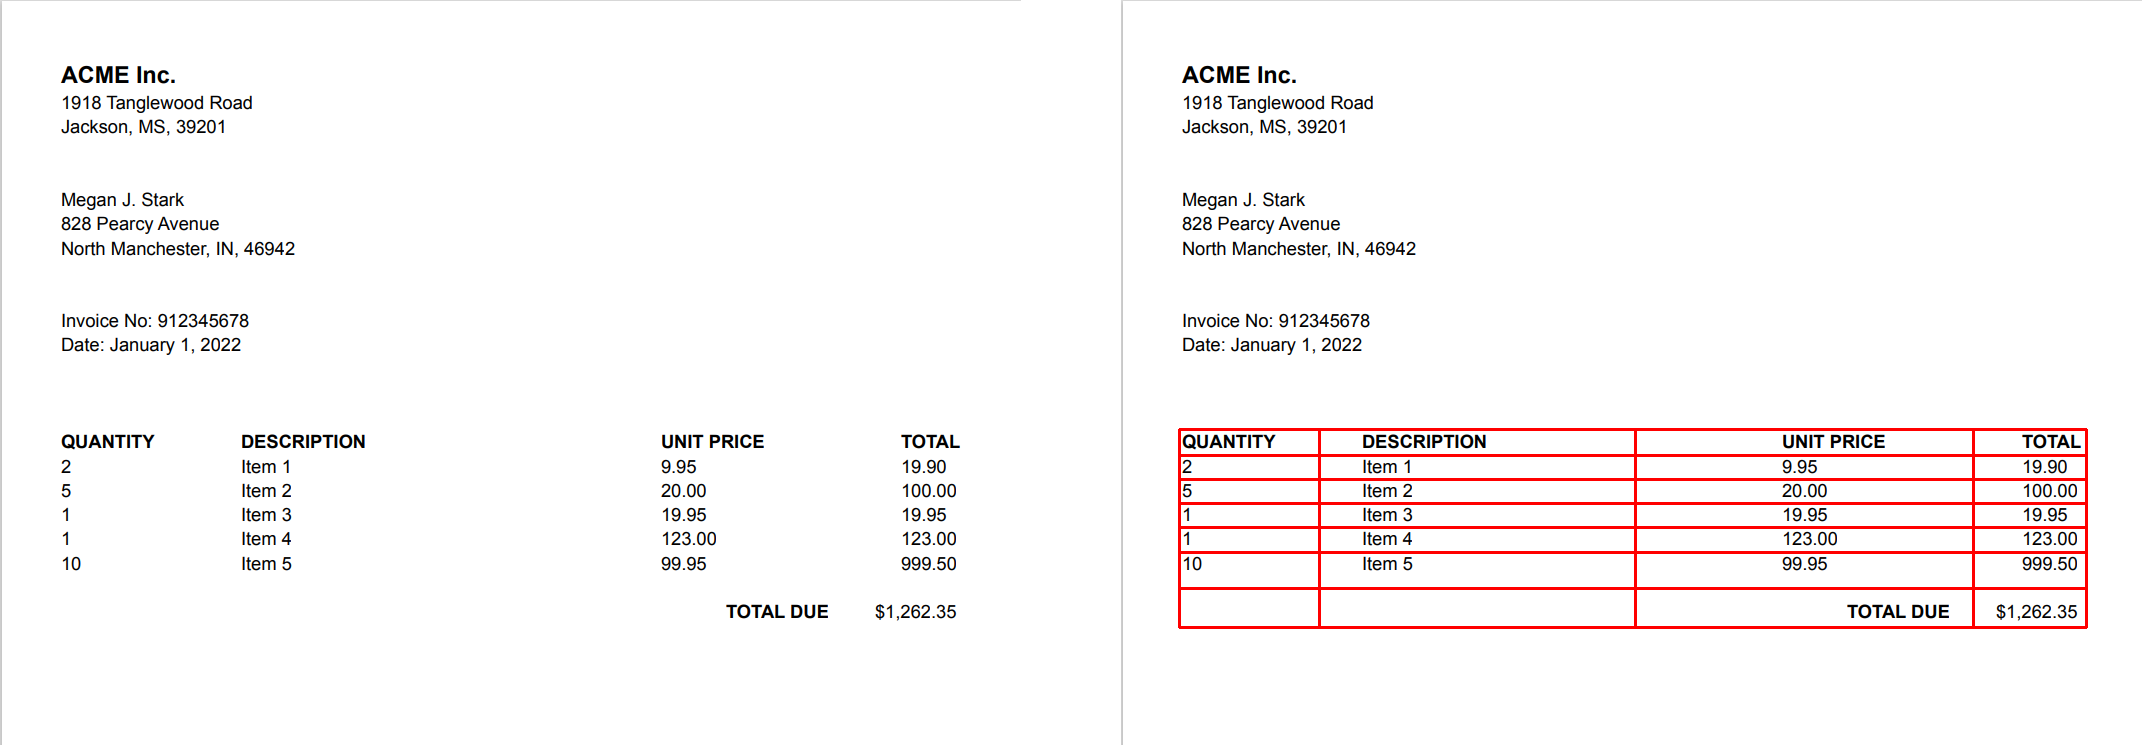

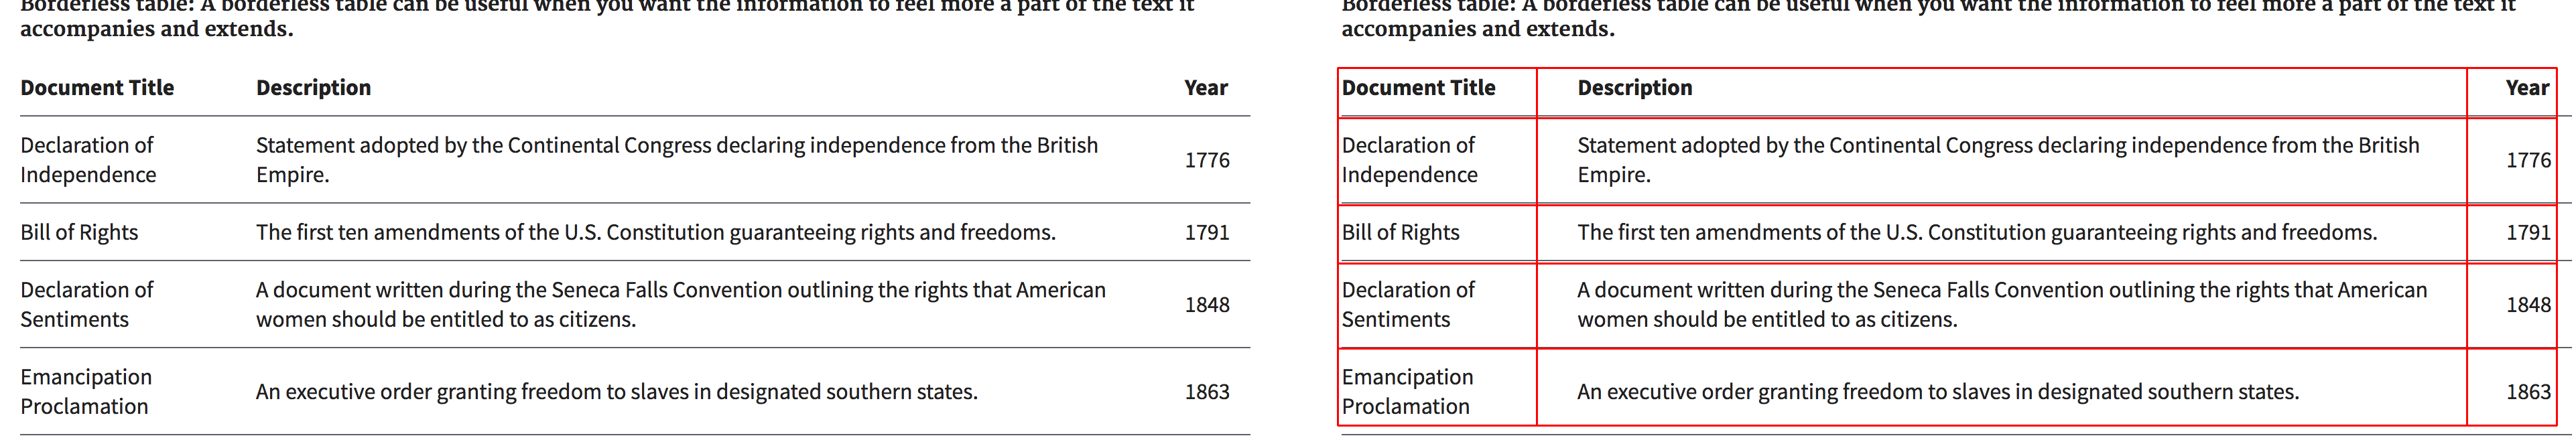

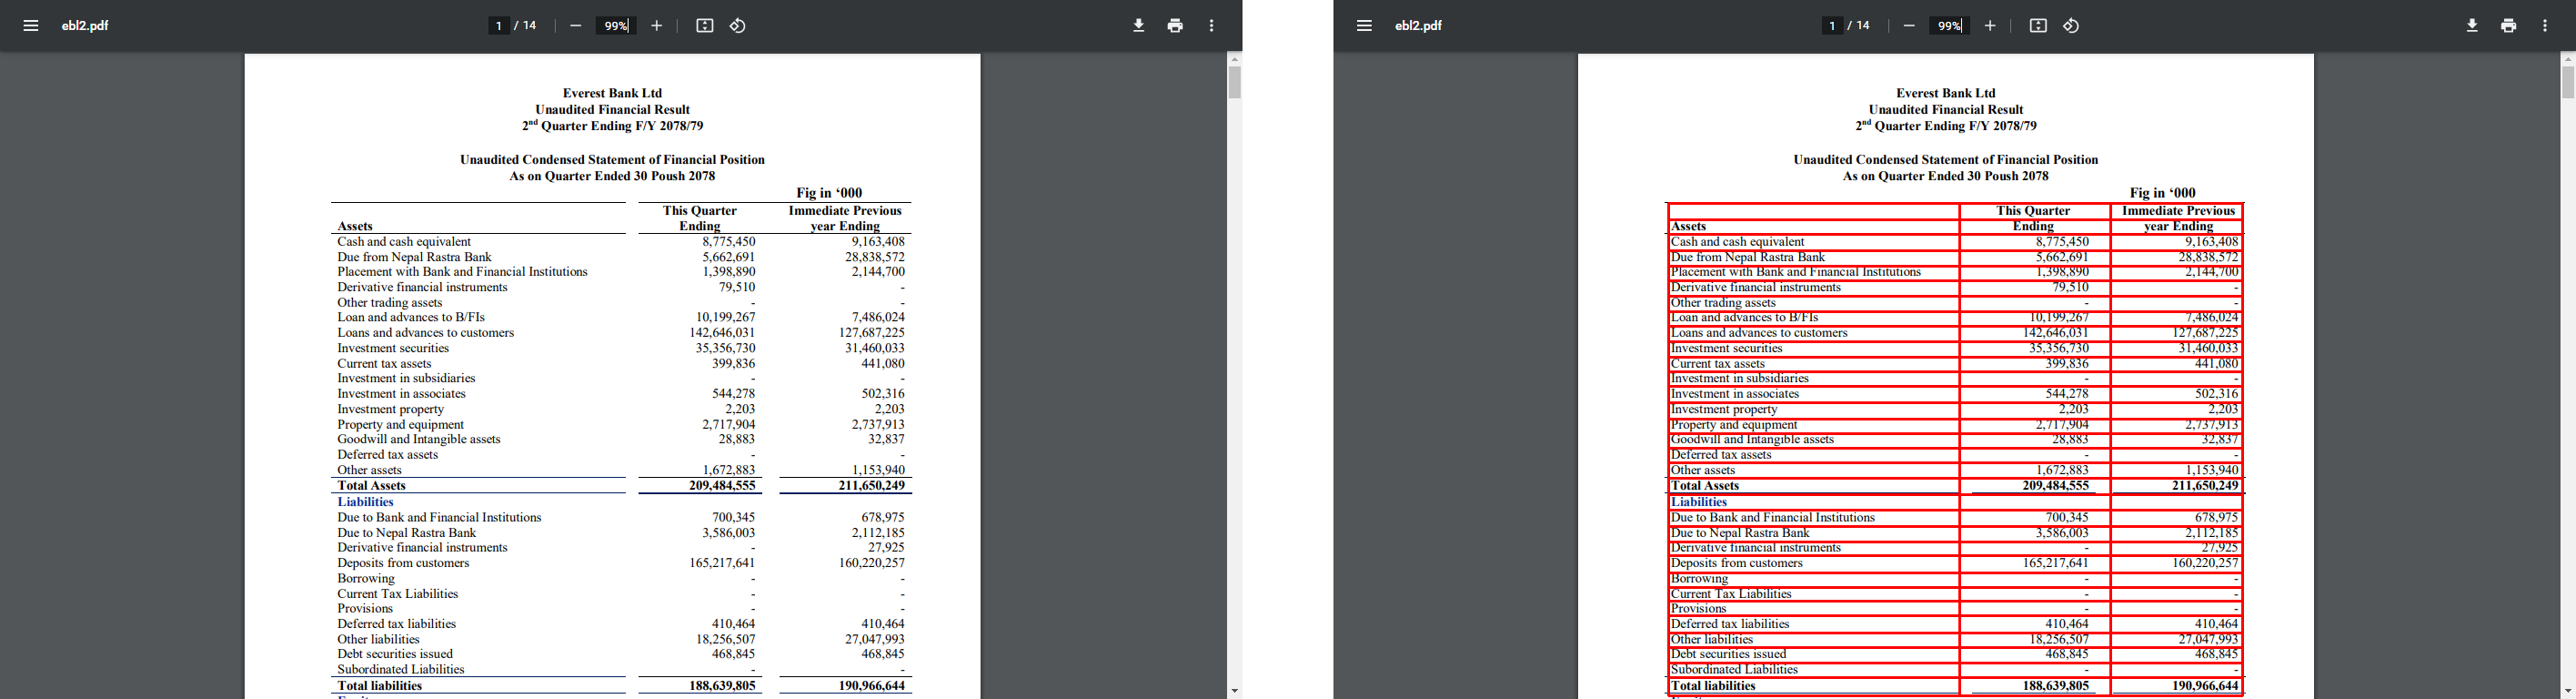

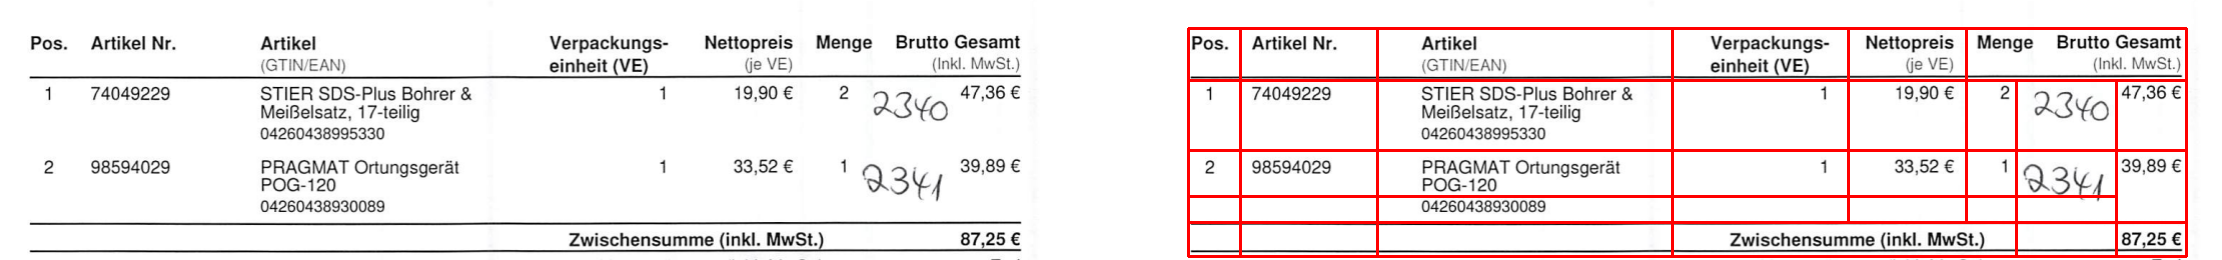

time: 4.44 s (started: 2024-07-29 19:04:20 +02:00)


In [3]:
for img_path in os.listdir("data/borderless"):
    img = Image(f"data/borderless/{img_path}")
    display_img = display_borderless_tables(img=img, ocr=tesseract)
    
    display(PILImage.fromarray(display_img))
    display_html("<hr>", raw=True)